# Project 9: Root Finding (e.g., Newton's Algorithm)
## Abstract
In this project, we're exploring algorithms for finding roots of arbitrary functions. I applied root finding techniques to finding energy eigenstates and values of a certain potential energy function V(x) in an infinite well of width 1. I used a potential energy function of 500 * x, one that would produce wavefunctions that is noticeably different from a well with a V(x) of 0. I got the Energy Eigenvalues for the first six energy states and their wave functions. One could validate the wave functions produced by confirming if they have the characteristics of valid wave functions which they did. This confirmed their validity.
## Description
In mathematics and computing, a root-finding algorithm is an algorithm for finding zeroes, also called "roots", of continuous functions. A zero of a function f, from the real numbers to real numbers or from the complex numbers to the complex numbers, is a number x such that f(x) = 0. As, generally, the zeroes of a function cannot be computed exactly nor expressed in closed form, root-finding algorithms provide approximations to zeroes, expressed either as floating point numbers or as small isolating intervals, or disks for complex roots (an interval or disk output being equivalent to an approximate output together with an error bound).

Solving an equation f(x) = g(x) is the same as finding the roots of the function h(x) = f(x) – g(x). Thus root-finding algorithms allow solving any equation defined by continuous functions. However, most root-finding algorithms do not guarantee that they will find all the roots; in particular, if such an algorithm does not find any root, that does not mean that no root exists.

Most numerical root-finding methods use iteration, producing a sequence of numbers that hopefully converge towards the root as a limit. They require one or more initial guesses of the root as starting values, then each iteration of the algorithm produces a successively more accurate approximation to the root. Since the iteration must be stopped at some point these methods produce an approximation to the root, not an exact solution. Many methods compute subsequent values by evaluating an auxiliary function on the preceding values. The limit is thus a fixed point of the auxiliary function, which is chosen for having the roots of the original equation as fixed points, and for converging rapidly to these fixed points.
## Algorithm and Discussion
In this project, we wanted to compute energy states of a potential in an infinite well, produce graphs of the wavefunction in a few energy states and validate our results. Due to the fact that we don't have an analytical expression for the derivative of the wave function, using the newton's method of root finding would be tricky. Therefore, we employed the use a python function, brentq. This function finds root of a function in a bracketing interval using Brent’s method. It finds a zero of a function f on the sign changing interval [a , b]. We used this function to find the energy value for which the wavefunction starts at zero and ends at zero for x. This function works when you give it a hint of where the zeroes could be, we did this by giving the function a sign changing interval. We used the energy at which the wave function is zero at the endpoints to plot the wave function. We validated these wave function graphs by confirming if they had characteristics of valid wave functions. The characterstics include: 

$\bullet$ The wave function (energy eigenfunction) must tend to a finite value (zero for bound-state solutions and a constant for scattering solutions) as x →  ± ∞.

$\bullet$ The wave function (energy eigenfunction) must be continuous and single valued.

$\bullet$ The wave function (energy eigenfunction) must be twice differentiable. In other words, the wave function's (energy eigenfunction's) first derivative must be continuous.

$\bullet$ An energy bound state, n, should have n - 1 nodes.

## Implementation and Code
I used a potential function of $ V(x) = 500 * x $. We can ues Runge Kutta method to integrate Schrodinger's Equation from $x=0$ to $x=L$, over the width of our well. 
$$-\frac{\hbar^2}{2m} \psi''(x) + V(x)\psi(x) = E\psi(x)$$$$\psi'' = \frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x)$$

In [556]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
import sympy as sp
from scipy.optimize import brentq

In [557]:
def V(x, a=3.0):

    """
    Here's an example potential V(x)=0.0
    """
    return 500 * x

psi0, psip0 = 0.0, 1.0   # start psi and psi'  at $x=0$.
s=np.array([psi0, psip0])

hbar=1.0  # pick convenient units
m=1.0
L=1.0

x = 0.0
dx = L/100

def RK4Step(s, x, derivs, dx, E):
    """
    Take a single RK4 step. (our old friend)
    But this time we're integrating in 'x', not 't'.
    """
    dxh=dx/2.0
    f1 = derivs(s, x, E)
    f2 = derivs(s+f1*dxh, x+dxh, E)
    f3 = derivs(s+f2*dxh, x+dxh, E)
    f4 = derivs(s+f3*dx, x+dx, E)
    return s + (f1+2*f2+2*f3+f4)*dx/6.0

def SWE_derivs(s, x, E):
    psi=s[0]
    psip=s[1]
    
    psipp =(2*m/hbar**2)*(V(x)-E)*psi
    return np.array([psip, psipp])

In [558]:
def calcBC(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx

    return s[0]

We provide the brentq function a sign changing interval and call the calcBC function which calculates the Energy eigenvalue for the wave function.

In [559]:
print ("BC at E=116.9055:",calcBC(116.9055))
print ("BC at E=116.90555:",calcBC(116.90555))

BC at E=116.9055: 0.013228630958555821
BC at E=116.90555: -0.09048816394027163


In [560]:
Ezero1 = brentq(calcBC, 116.9055, 116.90555)  # find "root" with brentq
Ezero1

116.90550637726967

We plot our wavefunction with result gotten from the application of Brent's method from the brentq function.

Text(0, 0.5, 'psi(x)')

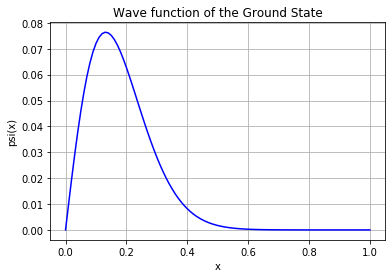

In [561]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero1)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the Ground State")
pl.xlabel("x")
pl.ylabel("psi(x)")

I repeated the same process above for 5 more energy levels. I plotted the wave functions for n = 1 to n = 6.

In [562]:
print ("BC at E=204.4:",calcBC(204.4))
print ("BC at E=204.39:",calcBC(204.39))

BC at E=204.4: 0.04645544340305957
BC at E=204.39: -0.22073967161715574


In [563]:
Ezero2 = brentq(calcBC, 204.4, 204.39)  # find "root" with brentq
Ezero2

204.3982606804746

Text(0, 0.5, 'psi(x)')

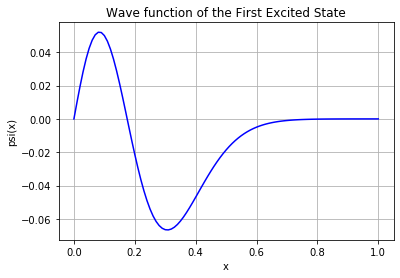

In [564]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero2)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the First Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [565]:
print ("BC at E=276.1:",calcBC(276.1))
print ("BC at E=275.9:",calcBC(275.9))

BC at E=276.1: -0.08278579130594428
BC at E=275.9: 0.15495120668765505


In [566]:
Ezero3 = brentq(calcBC, 276.1, 275.9)  # find "root" with brentq
Ezero3

276.0299815179757

Text(0, 0.5, 'psi(x)')

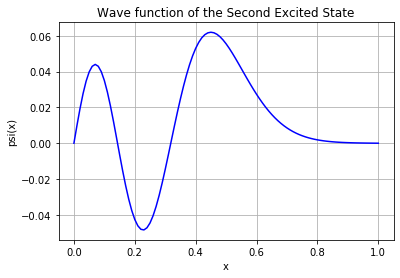

In [567]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero3)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the Second Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [568]:
print ("BC at E=339:",calcBC(339))
print ("BC at E=340:",calcBC(340))

BC at E=339: -0.03979845789479233
BC at E=340: 0.07356990033024659


In [569]:
Ezero4 = brentq(calcBC, 339, 340)  # find "root" with brentq
Ezero4

339.3433090398662

Text(0, 0.5, 'psi(x)')

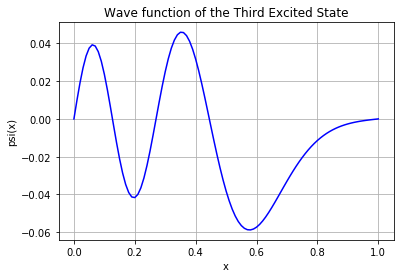

In [570]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero4)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the Third Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [571]:
print ("BC at E=396.8:",calcBC(396.8))
print ("BC at E=397.8:",calcBC(397.8))

BC at E=396.8: 0.0121172748794438
BC at E=397.8: -0.008739893624896578


In [572]:
Ezero5 = brentq(calcBC, 397.8, 396.8)  # find "root" with brentq
Ezero5

397.37474460112355

Text(0, 0.5, 'psi(x)')

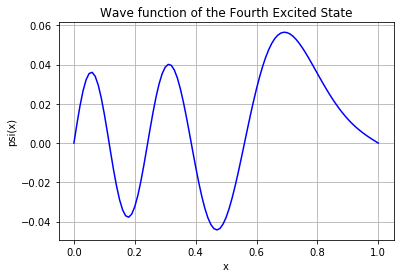

In [573]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero5)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the Fourth Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [574]:
print ("BC at E=452.8:",calcBC(452.8))
print ("BC at E=453.8:",calcBC(453.8))

BC at E=452.8: -0.0029066451860679135
BC at E=453.8: 0.003645818324319622


In [575]:
Ezero6 = brentq(calcBC, 452.8, 453.8)  # find "root" with brentq
Ezero6

453.2397569771069

Text(0, 0.5, 'psi(x)')

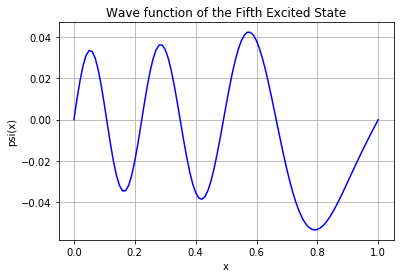

In [576]:
def calcBC_wPsi(E):
    """
    Compute the value of psi(x) at x=L for a given value of E
    assuming psi(0) is zero.
    """
    s=np.array([psi0, psip0])
    x=0.0
    xList=[x]
    psiList=[psi0]
    
    while x<L:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        x+=dx
        xList.append(x)
        psiList.append(s[0])

    return xList, psiList

xList, psiList = calcBC_wPsi(Ezero6)
pl.plot(xList, psiList, 'b-')
pl.grid()
pl.title("Wave function of the Fifth Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

## Results and Discussion

In [577]:
print ("Energy Eigenvalue for n = 1: %5.4f" % Ezero1)
print ("Energy Eigenvalue for n = 2: %5.4f" % Ezero2)
print ("Energy Eigenvalue for n = 3: %5.4f" % Ezero3)
print ("Energy Eigenvalue for n = 4: %5.4f" % Ezero4)
print ("Energy Eigenvalue for n = 5: %5.4f" % Ezero5)
print ("Energy Eigenvalue for n = 6: %5.4f" % Ezero6)

Energy Eigenvalue for n = 1: 116.9055
Energy Eigenvalue for n = 2: 204.3983
Energy Eigenvalue for n = 3: 276.0300
Energy Eigenvalue for n = 4: 339.3433
Energy Eigenvalue for n = 5: 397.3747
Energy Eigenvalue for n = 6: 453.2398


Above are the Energy Eigenstates and Energy eigenvalues of an infinite well of potential, $V(x) = 500 * x$

If we take a look at the wave function graphs of this states, we can see the follow the characteristics of valid wave functions:

$\bullet$ The wave function (energy eigenfunction) must tend to a finite value (zero for bound-state solutions and a constant for scattering solutions) as x →  ± ∞.

$\bullet$ The wave function (energy eigenfunction) must be continuous and single valued.

$\bullet$ The wave function (energy eigenfunction) must be twice differentiable. In other words, the wave function's (energy eigenfunction's) first derivative must be continuous.

$\bullet$ An energy bound state, n, should have n - 1 nodes.

We can see that for all graphs, they all approach zero as x increases, they are continuous, they have appropriate number of nodes. For example, for n = 6, the wave function graph crosses the x-axis 5 times.

## Conclusion
We have used root finding techniques to compute energy eigen values for a potential in an infinite well and we plotted the wave function graphs for this. We did this for 6 bound states, this includes the bound state. We validated the wave functions produced by confirming if they have the characteristics of valid wave functions which they did.